In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Visualize the shape of data, the type of data , the missing values , unique counts , and build a data dictionary dataframe.   

In [6]:
train.shape

(891, 12)

In [25]:
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(train.dtypes)
Data_dict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [26]:
# identifying the missing values from the dataset.

Data_dict['MissingVal'] = train.isnull().sum()
Data_dict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [27]:
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.

Data_dict['UniqueVal'] = train.nunique()
Data_dict

,0,MissingVal,UniqueVal
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [29]:
# identifying count of the variable.

Data_dict['Count'] = train.count()
Data_dict

,0,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [32]:
# renaming the first column using rename()

Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


### Run discriptive statistics on objects and other  numerical datatypes.

In [3]:
# get discriptive statistics on "objects" datatypes
train.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lefebre, Miss. Mathilde",male,1601,B96 B98,S
freq,1,577,7,4,644


In [6]:
# get discriptive statistics on "number" datatypes
train.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Applying Univariate and Multivariate Data Analysis using graphical representations

#### Univariate Data Analysis

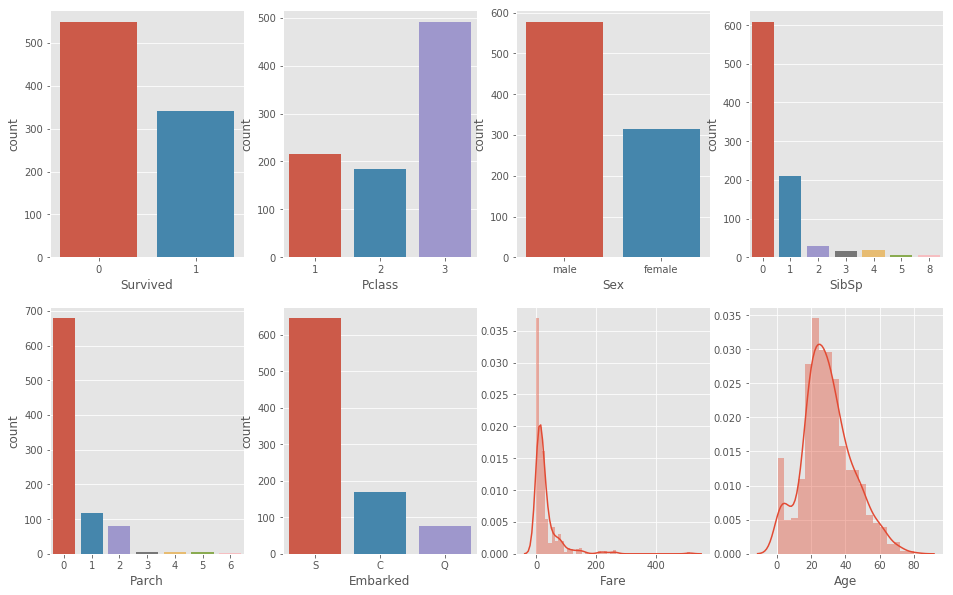

In [7]:
fig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot('Survived' , data = train, ax = axes[0,0])
sns.countplot('Pclass' , data = train, ax = axes[0,1])
sns.countplot('Sex' , data = train, ax = axes[0,2])
sns.countplot('SibSp' , data = train, ax = axes[0,3])
sns.countplot('Parch' , data = train, ax = axes[1,0])
sns.countplot('Embarked' , data = train, ax = axes[1,1])
sns.distplot(train['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(train['Age'].dropna() , kde = True , ax = axes[1,3])

#### Bivariate Data Analysis

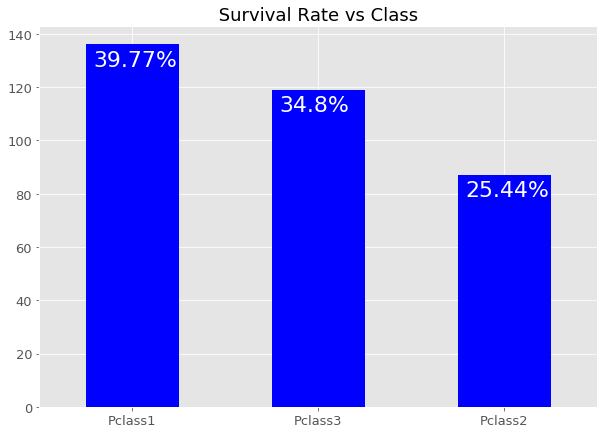

In [22]:
Pclass_survival = train[train.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Class ", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')


#### Joint Plot 

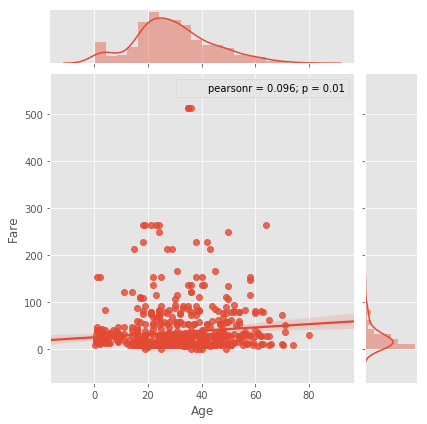

In [50]:
sns.jointplot(x = 'Age' , y = 'Fare' , data = train, kind = 'reg');

### Multivariate EDA

#### There is a positive correlation between Fare and Survived and negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass.

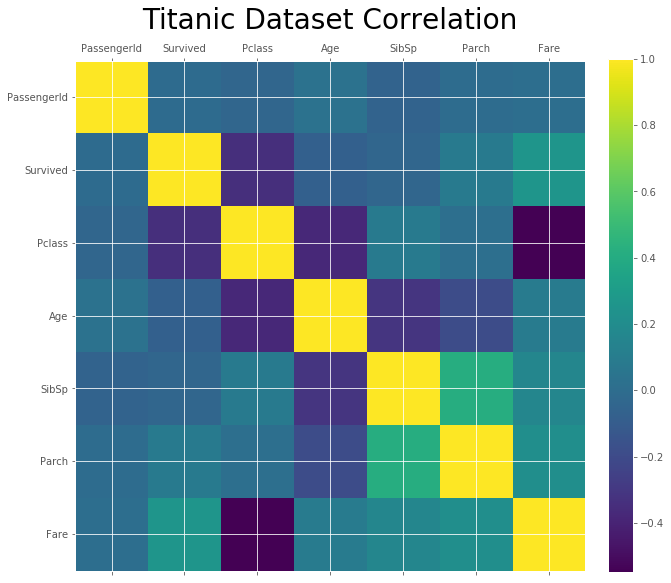

In [75]:
# For multivariate data analysis I've used pandas "correlation matrix" . You can also use seaborn "heatmap".
def plotting_corr( train , size = 10):
    corr = train.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Titanic Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(train , size = 10)


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
male_passengers = train[train.Sex == 'male']
male_passengers.Survived.value_counts()
male_passengers[male_passengers.Fare < 32.204207968574636].Survived.value_counts()


0    394
1     76
Name: Survived, dtype: int64

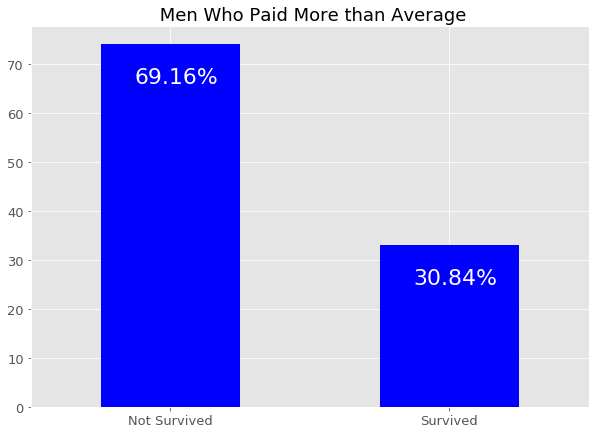

In [10]:
ax = male_passengers[male_passengers.Fare > 32.204207968574636].Survived.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(2), ['Not Survived' , 'Survived'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Men Who Paid More than Average", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')


#### Men Who Paid Less Than Average

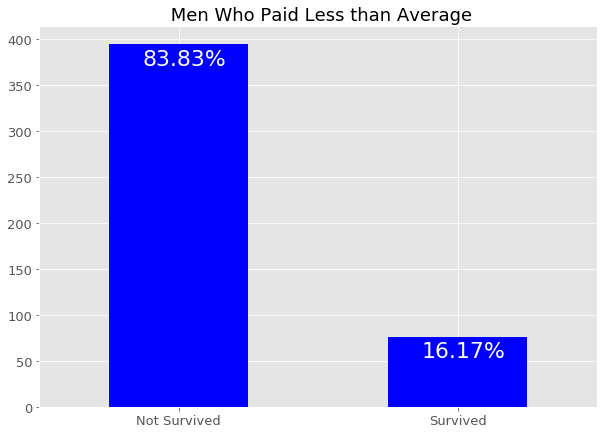

In [11]:
ax = male_passengers[male_passengers.Fare < 32.204207968574636].Survived.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(2), ['Not Survived' , 'Survived'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Men Who Paid Less than Average", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-22, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')


### Female Passengers

In [9]:
female_passengers = train[train.Sex == 'female']
female_passengers.Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

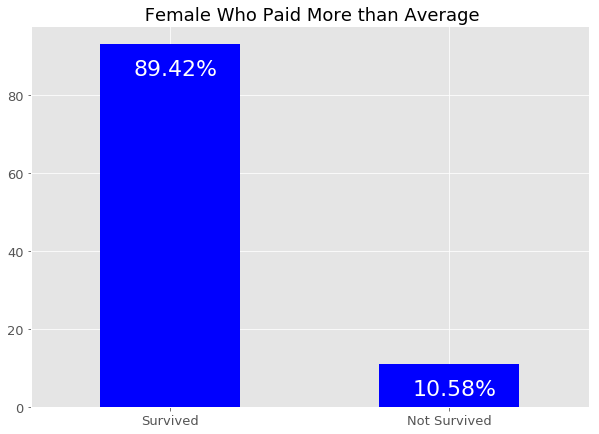

In [10]:
ax = female_passengers[female_passengers.Fare > 32.204207968574636].Survived.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks([0,1], ['Survived' , 'Not Survived'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Female Who Paid More than Average", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')


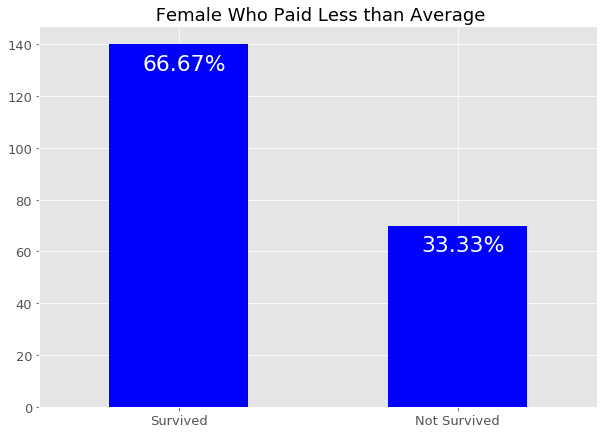

In [11]:
ax = female_passengers[female_passengers.Fare < 32.204207968574636].Survived.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks([0,1], ['Survived' , 'Not Survived'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Female Who Paid Less than Average", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-10, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')


In [28]:
train.groupby('Pclass')['Survived'].describe()


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [39]:
train[train.Pclass == 1].Survived.value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [70]:
corr = train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
